In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import os

우선 이미지 데이터를 로드하고 학습하기 좋은 형태로 변형시키기까지의 과정이 항상 어려웠기 때문에 익숙해지게 하기 위해서 해당 과정을 연습해 보았다.

주로 keras의 image data processing이 가능하도록 하는 module을 이용하였다.

In [3]:
hw_labels = pd.read_csv("C:\written_name_validation_v2.csv", index_col = 'FILENAME')
hw_labels.head()

,IDENTITY
FILENAME,
VALIDATION_0001.jpg,BILEL
VALIDATION_0002.jpg,LAUMIONIER
VALIDATION_0003.jpg,LEA
VALIDATION_0004.jpg,JEAN-ROCH
VALIDATION_0005.jpg,RUPP


보면 hw_labels는 각각의 이미지에 대한 파일명을 index로서 가지며 'IDENTITY' label에 사진속의 손글씨가 의미하는 바를 나타낸다.

따라서 학습과 예측을 할 때에 해당 
keras.preprocessing.image의 load_img 모듈은 적은 양의 이미지 데이터를 불러오는데 유리하다.

In [4]:
from tensorflow.keras.preprocessing.image import load_img
img = load_img("C:/validation_v2/validation/VALIDATION_0005.jpg")
img

#### 1-1. img directory 저장하기(os 이용하기)
os모듈의 기능을 이용해서 모든 이미지 데이터의 directory를 img_dir이라는 리스트에 저장하는 방법을 사용하였다.

In [5]:
base_dir = 'C:/validation_v2/validation'
name_list = os.listdir(base_dir)
img_dir_1 = []
for i in name_list:
    img_dir_1.append(os.path.join(base_dir, i))
load_img(img_dir_1[4325])

#### 1-2. img directory 저장하기(patlib 이용하기)

In [16]:
import pathlib
img_dir_2 = pathlib.Path(base_dir)
image_count = len(list(img_dir_2.glob('*.jpg')))
list_ds = tf.data.Dataset.list_files(str(img_dir_2/'*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [17]:
for i in list_ds.take(5):
    print(i.numpy())

b'C:\\validation_v2\\validation\\VALIDATION_13811.jpg'
b'C:\\validation_v2\\validation\\VALIDATION_5705.jpg'
b'C:\\validation_v2\\validation\\VALIDATION_23411.jpg'
b'C:\\validation_v2\\validation\\VALIDATION_41122.jpg'
b'C:\\validation_v2\\validation\\VALIDATION_17455.jpg'


#### 2-1. Image Preprocessing(tf.image.decode_jepg이용)

In [18]:
def get_label(file_path):
  #이미지 경로 리스트에 저장된것을 각각 문자열로 분리한 뒤에 마지막 값, 즉 이미지의 이름을 label로 return한다.
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-1]

In [19]:
def decode_img(img):
    #string 형태를 3D uint8 텐서로 바꾸어준다
    img = tf.image.decode_jpeg(img, channels=3)
    #이미지의 크기를 원하는 사이즈로 바꾸어 준다.
    return tf.image.resize(img, [img_height, img_width])

In [20]:
def process_path(file_path):
    label = get_label(file_path)
    #directory로부터 이미지 파일을 string의 형태로 읽는다.
    img = tf.io.read_file(file_path)
    #위에서 정의한 img decoding 함수를 이용한다.
    img = decode_img(img)
    return img/255.0, label

In [21]:
batch_size = 32
img_height, img_width = 50, 300

In [22]:
train_data = list_ds.map(process_path)

In [5]:
y = []
for i in range(len(img_dir_1)):
    y.append(hw_labels['IDENTITY'][i])

In [6]:
y

['BILEL',
 'LAUMIONIER',
 'LEA',
 'JEAN-ROCH',
 'RUPP',
 'UNREADABLE',
 'PICHON',
 'DANIEL',
 'JEREMY',
 'JEAN-MICHEL',
 'JULIEN',
 'NAEL',
 'BILGER',
 'TIFFANY',
 'ELEEN',
 'ANTOINE',
 'AYOUB',
 'MINETTE',
 'RAINGEVAL',
 'CELESTIN',
 'DIBENEDETTO',
 'MATHIS',
 'LOUNA',
 'SEVESTRE',
 'DAVANLAY',
 'HOCQUARD',
 'LEBRUN',
 'DABIN',
 'SENDOUBI',
 'DI PASQUALE',
 'PRIVAT',
 'HUGO',
 'MAONI',
 'COTTIGNY',
 'SARRAZIN',
 'FRERE',
 'MONSOH',
 'BELMERROUBICARRO',
 'CLEMENT',
 'ALLEMBRAND',
 'CASSANORA',
 'VIEILLE',
 'VAUTIER',
 'LOUISE',
 'DUTARR ICR',
 'ENNIO',
 'ALYSSIA',
 'RUIZ',
 'LIZANA',
 'CAMILLE',
 'JULIE',
 'ELIA',
 'AXEL',
 'ANTOINE',
 'NION',
 'RICHARD',
 'COONAC',
 'DAVOULT',
 'SAAD',
 'DUBOIS',
 'NAU',
 'JULIEN',
 'BENET',
 'DAVID',
 'THOMAS',
 'VAILLANT',
 'JOAO',
 'LYLOU',
 'CARA',
 'TABUT',
 'PELLETIER',
 'AUTRET',
 'CHECROUN',
 'VASSEUR',
 'FAURE',
 'EMMA',
 'ARTHUR',
 'FRIMIN',
 'ANAELLE',
 'DYEAN',
 'RAPHEL',
 'VANTOMME',
 'OMNES',
 'ANTOINE',
 'ANDRANIK',
 'LUCAS',
 'CELIA',


In [14]:
len(x), len(y)

(41370, 41370)

In [15]:
y[0]

'BILEL'

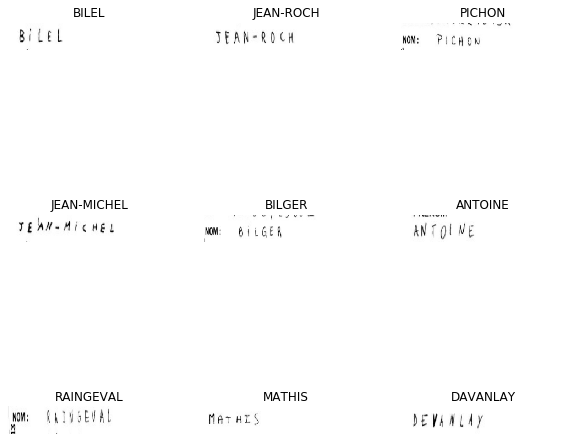

In [16]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x[i*3])
    plt.title(y[i*3])
    plt.axis("off")

x와 y라는 리스트 각각에 잘 저장이 되어있다. x에는 이미지 데이터가 array로 저장이 되어있고, y에는 각각의 이미지 데이터에 대한 제목,즉 사진속 글씨가 의미하는 바가 label로 저장이 되어있다.

이제 이 사진 속 단어속의 글자 각각을 따로 학습해서 한꺼번에 인식할때 단어를 읽을 수 있도록 CNN으로 학습을 시키고 싶은데, 그러기 위해서는 openCV를 이용해서 각각의 단어를 인식하거나 각각의 위치의 좌표를 인식해야 할 것이다. 그러나 현재의 데이터에는 해당 죄표가 주어져 있지 않기 때문에 구역 설정을 하기가 어렵다. 그럼에도 불구하고 CNN학습을 시켜보면 좋을 것 같다.

그냥 model.Sequential()을 이용해서 CNN모델을 만들 것이다.

그런데 여기서 문제는 label의 값을 어떻게 예측할 수 있도록 만들것인가인데, 만약에 LabelEncoder을 이용해서 label을 그냥 전부 아무 의미없는 숫자로 바꾸어 버린다면 학습을 시키는 의미가 없을 것이다. 따라서 label의 글자속의 알파벳마다 숫자를 지정해 주어야 할 것이다.

아니면 그냥 문자열 그대로 이용해도 될 것일수도 있겠다.


In [24]:
y

['BILEL',
 'LAUMIONIER',
 'LEA',
 'JEAN-ROCH',
 'RUPP',
 'UNREADABLE',
 'PICHON',
 'DANIEL',
 'JEREMY',
 'JEAN-MICHEL',
 'JULIEN',
 'NAEL',
 'BILGER',
 'TIFFANY',
 'ELEEN',
 'ANTOINE',
 'AYOUB',
 'MINETTE',
 'RAINGEVAL',
 'CELESTIN',
 'DIBENEDETTO',
 'MATHIS',
 'LOUNA',
 'SEVESTRE',
 'DAVANLAY',
 'HOCQUARD',
 'LEBRUN',
 'DABIN',
 'SENDOUBI',
 'DI PASQUALE',
 'PRIVAT',
 'HUGO',
 'MAONI',
 'COTTIGNY',
 'SARRAZIN',
 'FRERE',
 'MONSOH',
 'BELMERROUBICARRO',
 'CLEMENT',
 'ALLEMBRAND',
 'CASSANORA',
 'VIEILLE',
 'VAUTIER',
 'LOUISE',
 'DUTARR ICR',
 'ENNIO',
 'ALYSSIA',
 'RUIZ',
 'LIZANA',
 'CAMILLE',
 'JULIE',
 'ELIA',
 'AXEL',
 'ANTOINE',
 'NION',
 'RICHARD',
 'COONAC',
 'DAVOULT',
 'SAAD',
 'DUBOIS',
 'NAU',
 'JULIEN',
 'BENET',
 'DAVID',
 'THOMAS',
 'VAILLANT',
 'JOAO',
 'LYLOU',
 'CARA',
 'TABUT',
 'PELLETIER',
 'AUTRET',
 'CHECROUN',
 'VASSEUR',
 'FAURE',
 'EMMA',
 'ARTHUR',
 'FRIMIN',
 'ANAELLE',
 'DYEAN',
 'RAPHEL',
 'VANTOMME',
 'OMNES',
 'ANTOINE',
 'ANDRANIK',
 'LUCAS',
 'CELIA',


현재 이미지들의 directory가 저장된 리스트가 img_dir_1이고 각각의 label은 y라는 리스트에 저장이 되어 있다.

In [31]:
os.mkdir('C:/HandWritten')

In [38]:
import os
import cv2
x_image_data = []
y_image_data = []
for i in range(500):
    img= cv2.imread(img_dir_1[i], cv2.IMREAD_COLOR)
    img = cv2.resize(img, (224,224))
    x_image_data.append(img)
    y_image_data.append(hw_labels['IDENTITY'][i])

원래는 이게 데이터의 개수가 43170개로 너무 많았기 때문에 계속해서 memory error이 발생하였다. 그래서 500개의 데이터만 사용해보았더니 해결이 손쉽게 되었다.

In [52]:
x_image_data = np.array(x_image_data, dtype = 'float32').reshape(-1,224,224,3)
y_image_data= np.asarray(y_image_data).reshape(500)

In [53]:
index = np.arange(x_image_data.shape[0])
np.random.shuffle(index)

In [54]:
x_image_data = x_image_data[index]
y_image_data = y_image_data[index]

In [83]:
batch = 8
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
y_image_data = LabelEncoder.fit_transform(y_image_data)
y_image_data

array([  5, 421, 169, 143, 331, 272, 402, 203,  15, 127, 164,  48, 138,
       343, 141, 224, 426, 287, 218, 224, 267,  12, 192, 288, 257, 242,
       118,  28, 238, 364,  14, 139, 102, 404, 112, 194, 316,  74, 135,
       170, 424, 216, 346,  66,  94,  59, 376, 397, 320, 386, 330, 413,
       225,  93,  79, 244, 133, 400, 382,  89, 198,  72, 419, 442, 262,
       232,  23, 375, 433,  55, 195, 174, 235, 355, 353, 370, 148, 211,
       217, 301, 283, 252, 378, 173, 147, 164, 403, 284, 279,  12, 372,
        67, 363,  58, 377, 107, 184, 360, 390, 196,  37, 441,  19,  27,
       359, 175, 292,  95, 334, 200,  16, 177,  13, 318,  88, 298, 186,
        38, 322, 259, 356, 130,   0,  81, 342, 296,  83, 339, 180,  44,
       239, 261, 131,  82,  13, 385, 383, 187, 396, 344,  22,  90, 295,
       348, 142, 374,  21,  84, 247, 255, 336, 209, 332, 369, 120, 296,
       205, 248, 121, 167, 294, 134, 241, 110,  71,  75, 227,  27, 193,
       152, 349, 182,  94, 115,  29, 297,  64,  86,  17,  25, 34

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_image_data,y_image_data, test_size = 0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size = 0.2 )

In [85]:
len(y_val), len(x_val)

(90, 90)

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_datagen = ImageDataGenerator(rescale = 1/255)

In [87]:
batch = 8
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [88]:
image_datagen.fit(x_train)

In [89]:
train_data = image_datagen.flow(x_train, y_train, batch_size = batch)

In [90]:
test_data = image_datagen.flow(x_test, y_test, batch_size =batch)
val_data= image_datagen.flow(x_val, y_val, batch_size = batch)

In [91]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape = (224,224,3), filters = 32, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2),strides = (2,2)))
f = 32
for i in range(4):
    model.add(tf.keras.layers.Conv2D(filters = 32*((i+1)*2), kernel_size = 3, activation = 'relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(tf.keras.layers.Dropout(rate = 0.2))
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'softmax'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'softmax'))
    

In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 53, 53, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 192)      

In [95]:
reduce_on = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', patience = 5, verbose = 1, mode = 'max', min_lr = 0.000001)
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(lr = 0.0001), metrics = ['accuracy'])

loss = 'sparse_categorical_crossentropy'를 하게 되면 무조건 출력값이 0과1사이여야 하기 때문에 이 경우에는 사용할 수가 없다.따라서 'mse'로 바꾸게 되었다.

In [96]:
history = model.fit(train_data,steps_per_epoch = len(x_train)/batch, validation_data = val_data, epochs = 20, callbacks = [reduce_on])

Train for 45.0 steps, validate for 12 steps
Epoch 1/20
45/45 [==============================] - 16s 354ms/step - loss: 63276.9000 - accuracy: 0.0028 - val_loss: 68076.2708 - val_accuracy: 0.0000e+00
Epoch 2/20
45/45 [==============================] - 19s 415ms/step - loss: 63276.9000 - accuracy: 0.0028 - val_loss: 68076.2708 - val_accuracy: 0.0000e+00
Epoch 3/20
45/45 [==============================] - 19s 411ms/step - loss: 63276.9000 - accuracy: 0.0028 - val_loss: 68076.2708 - val_accuracy: 0.0000e+00
Epoch 4/20
45/45 [==============================] - 19s 423ms/step - loss: 63276.9000 - accuracy: 0.0028 - val_loss: 68076.2708 - val_accuracy: 0.0000e+00
Epoch 5/20
45/45 [==============================] - 19s 416ms/step - loss: 63276.9000 - accuracy: 0.0028 - val_loss: 68076.2708 - val_accuracy: 0.0000e+00
Epoch 6/20
44/45 [============================>.] - ETA: 0s - loss: 63731.4659 - accuracy: 0.0028
Epoch 00006: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
45/

In [98]:
model.evaluate(test_data)

7/7 [==============================] - 1s 72ms/step - loss: 69002.2857 - accuracy: 0.0000e+00


[69002.28571428571, 0.0]

accuracy가 엄밀히 말하면 0%에 가깝게 나왔다. 

사실 모델 자체는 VGG16모델 + DNN을 구현한 것임에도 불구하고 당연히 정확도가 낮게 나올 수 밖에 없었다.

지금 사진의 단어를 보고 맞추어야 하는 것인데 단어들을 하나 분리해서 글자별로 학습하는 것도 아니었기 때문이다.

따라서 이번 데이터셋의 의의는 결국에는 이미지 데이터 다루고 처리하고, ImageDataGenerator을 이용하는 것에 익숙해지고 이미지 데이터 전처리를 연습하는 것 그 이상도 이하도 아니었다고 생각한다.